In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import numpy as np
from matplotlib import pyplot
from collections import OrderedDict
import cv2
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

train_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=False, transform=torchvision.transforms.ToTensor())

lr = 0.1
epoch = 10
batch_size=100


train_iter = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_data, batch_size=batch_size, shuffle=True)



loss = nn.CrossEntropyLoss()

# for feature, label in train_iter:
#     print(feature.shape)
#     print(label)
#     break

# 返回 shape: 100(batch_size) x 784 的 tensor
class FlattenLayer(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        # 原 shape [batch_size, 1, 28, 28] 返回 [batch_size, 784]
        return x.view(x.shape[0], -1)

num_outputs = 10
    

net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(128, 10))

optim = torch.optim.SGD(net.parameters(), lr=lr)


In [7]:
# 训练
for e in range(epoch):
    correct = 0
    total = 0
    for X, y in train_iter:
        y_pred = net(X)
        l = loss(y_pred, y).sum()
        l.backward()
        optim.step()
        optim.zero_grad()
        correct += (y_pred.argmax(dim=1) == y).float().sum()
        total += y.shape[0]
    test_acc = d2l.evaluate_accuracy(test_iter, net)
    print('[Epoch]', e)
    print('[Train accuracy]', (correct / total).item())
    print('[test accuracy]', test_acc)
    


[Epoch] 0
[Train accuracy] 0.7923499941825867
[test accuracy] 0.9187
[Epoch] 1
[Train accuracy] 0.9205999970436096
[test accuracy] 0.9450333333333333
[Epoch] 2
[Train accuracy] 0.9424333572387695
[test accuracy] 0.9566333333333333
[Epoch] 3
[Train accuracy] 0.9526333212852478
[test accuracy] 0.9619166666666666
[Epoch] 4
[Train accuracy] 0.9591333270072937
[test accuracy] 0.9670166666666666
[Epoch] 5
[Train accuracy] 0.9636666774749756
[test accuracy] 0.9698666666666667
[Epoch] 6
[Train accuracy] 0.9694166779518127
[test accuracy] 0.9716666666666667
[Epoch] 7
[Train accuracy] 0.9711666703224182
[test accuracy] 0.9732166666666666
[Epoch] 8
[Train accuracy] 0.9733333587646484
[test accuracy] 0.9737666666666667
[Epoch] 9
[Train accuracy] 0.9751499891281128
[test accuracy] 0.97525


(28, 28)
result is  3


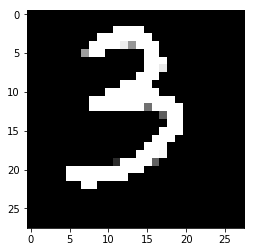

In [14]:
img = cv2.imread('./data/3.png', 0)

unloader = torchvision.transforms.ToPILImage()

r_img = cv2.resize(img, (28, 28))

print(r_img.shape) # (28, 28)

t_img = torchvision.transforms.functional.to_tensor(r_img)



pyplot.imshow(unloader(t_img), cmap="gray")


print('result is ', net(t_img.unsqueeze(0)).argmax().item())

shape torch.Size([1, 28, 28])
test[0] label is  5
predict test[0] is 5
ipykernel_launcher:1: DeprecationWarning: This function is deprecated. Please call randint(0, 9999 + 1) instead


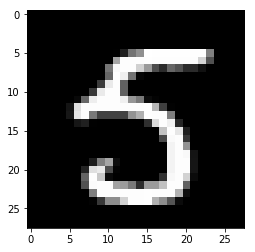

In [19]:
index = np.random.random_integers(0, 9999)
predict_label = test_data[index][1]
predict_data = test_data[index][0]


print('shape', predict_data.shape) # torch.Size([1, 28, 28])


pyplot.imshow(predict_data.view(28, 28), cmap="gray")

print('[num label] ', predict_label)
print('[predict result]', net(predict_data).argmax().item())